# 1. Example from the lecture in notebook style
The model can also be loaded from a string saved in a variable instead of the `simple_model.txt` file:

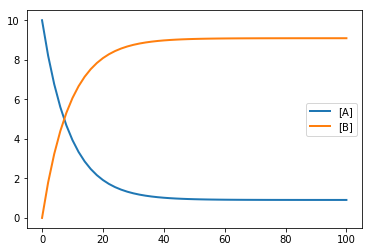

In [5]:
# import packages
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



simple_model = """
# Reactions
R1: A -> B; k1 * A;
R2: B -> A; k2 * B;

# Initial values
A = 10; A has mole;
B = 0;

# Parameters
k1 = 0.1;
k2 = 0.01;
"""

# load model from string
rr = te.loada(simple_model)

# Simulate model
result = rr.simulate (0, 100, selections=['time','A','B'])

# Plot the results
rr.plot(result)

# 2. What else does a model need and how do we write it in antimony?

From the minimal example we know already how to express 

2.1. <input type="checkbox" disabled checked> Reactions (kinetics)

2.2. <input type="checkbox" disabled checked> Species

2.3 <input type="checkbox" disabled checked> Parameters

2.4 <input type="checkbox" disabled checked> Initial conditions

Nevertheless, we will go through them again and then we add: &nbsp;

2.5 <input type="checkbox" disabled >  Assignments and ODEs

2.6 <input type="checkbox" disabled > Units

2.7 <input type="checkbox" disabled >  Compartments

2.8 <input type="checkbox" disabled > Events



Further things that we sadly can not cover today
- Data
- Annotations
- Environmental conditions
- ...



## 2.1 Reactions
#### There are 3 (more or less) important bits in a reaction:

1. The **name** of your reaction:
  > **name**: A + E -> B + 2C + E; kineticLaw;
  
  Name is optional. Yet, if no name is given, the fluxes for this reaction cannot be accessed.   
&nbsp;

2. The **stoichiometry**:

  > name: **A + E** -> **B + 2C + E**; kineticLaw;
  
3. The **kinetic law**:

  > name: A + E -> B + 2C + E; **kineticLaw**;

  If no kinetic law is given, nothing will happen!
  
  **Important convention:**  &nbsp;
  The kinetic law is always in units of **amount/time**!<sup>1</sup>
  
  The kinetic law can be written directly behind the reaction or in a additional assignment, for example:
   > name: A + E -> B + 2C + E; **kineticLaw**;
   
   > **kineticLaw** := k1 \* A \* E;
   
In our simple model this part of the model was

```# Reactions
R1: A -> B; k1 * A; 
R2: B -> A; k2 * B; 
```  


<div class="paragraph"><p>&#160;<br></p></div>
<sup>1</sup> This way it is consistent with stochastic simulations (you can directly run the 'gillespie'-algorithm in tellurium's solver: roadrunner) and furthermore any considerations regarding compartment sizes (even time depending compartment changes or transport reactions) are automatically done by the solver to get the correct concentrations for your species.

## 2.2, 2.3 & 2.4 Species, Parameters and their Initial values

**Every symbol** of the kinetics that is appearing in the stoichiometric part of the reaction equation will be regarded as a **species**. Setting its initial value can be done as in the simple model with

```# Initial values
A = 10;
B = 0;```

If no initial value was assigned, it is set to `A = 0;` per default.

**Every symbol** that is **not appearing** there will need to be defined afterwards. Otherwise, an error will tell you to do so, since there is no default value. In our simple model we had the following **parameters**:

```# Parameters
k1 = 0.01;
k2 = 1;```

## 2.5 Assignments and ODEs

There are 3 different ways to assign values in antimony:

1. This " = " is a simple assignment, basically an initialization:

    > ```parameter = 5
    species = 1
    species2 = species + parameter``` 

2. This " := " is a time-dependend assignment, the variable at the left will adapt, if the right hand side changes:

    > ```species0 := 3 * time
    species1 := species0```
    
3. This " '= " will create an ODE:

    > ```species'= k * species  ```


<div class="paragraph"><p>&#160;<br></p></div>
Note: ODEs are a bit different from the reaction formalism. Should you use compartments, you will have to care for the right handling of transport reactions between compartments yourself.

### Hands on! Add and test the additional concepts for the rest of our lecture in our simple model:
Alternatively, you can modify the python script that you wrote already (simple_model.txt and runmodel.py).

## 2.6 Units
Even though it might be tempting while playing with toymodels, it is *never* advisable to introduce elements to a model that do not carry a unit.

Units can be defined by using a list of **'base' units** (mostly SI and SI-derived): 
<img src="img/base-units.png">

Or you can define them by yourself:

```# Units
unit minute = 60 seconds;
unit hour = 3600 seconds;
unit alienliters = 0.123 liters;
unit fL = 1.e-15 liters;```<sup>1</sup>


Use them to assign the units right after the initial value or later in the code:

> A = 10 item;

> A is item;

'item' stands for a number (e.g. particles) - you need to have an interpretation of what it means.

**Excercise: Add the code for amounts to the following simple_model**. Don't forget the correct parameter units!

<div class="paragraph"><p>&#160;<br></p></div>
<sup>1</sup> Note: Adding an ‘s’ to the end of a unit name to make it plural is fine when defining a unit: ‘3600 second‘ is the same as ‘3600 seconds‘.

## 2.7 Compartments

After we used ```unit fL = 1.e-15 liters;``` to define the unit 'femtoliter', we can use it (or any arbitrarily defined units) to define compartments: 

```cell = 10 fL;
mitochondria = 10 fL;```

or alternatively

``` mitochondria = 10;
mitochondria has fL;
```

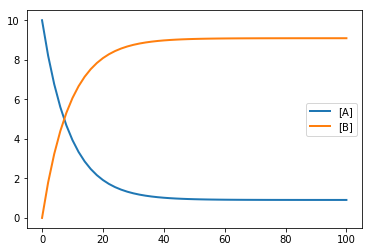

In [23]:
# Define the model and add compartments
simple_model_with_compartments = """
# Reactions
R1: A -> B; k1 * A;
R2: B -> A; k2 * B;

# Initial values
A = 10;
B = 0;

# Parameters
k1 = 0.1;
k2 = 0.01;

# 2.7 Events
# Compartmentalize our model!
"""

# Load model
rr = te.loada(simple_model_with_compartments)
# Simulate model
result = rr.simulate (0, 100)
# Plot the results
rr.plot(result)

## 2.8 Events

We can add events to the system that change it's behavior conditional to a boolean (True or False) statement. This could look like: 

> ```# Events
E1: at (A < 5): k2 = 1;
E2: at (time > 50): A = 5;```



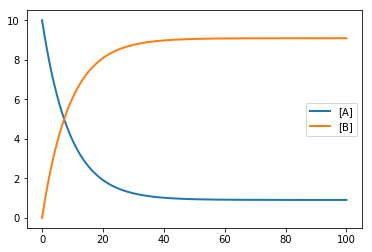

In [42]:
# Define the model
simple_model_with_events = """
# Reactions
R1: A -> B; k1 * A;
R2: B -> A; k2 * B;

# Initial values
A = 10; 
B = 0;

# Parameters
k1 = 0.1;
k2 = 0.01;

# 2.8 Events
# Add some events!
"""

# Load model
rr = te.loada(simple_model_with_events)
# Simulate model
result = rr.simulate (0, 100, 1001)
# Plot the results
rr.plot(result)

## 2.9 Parameterizing the model - an exercise
Let's say you want to analyse a particular dynamical system, and that system is accidentaly described by our ```simple_model```. From the literature you had deduced the structure of the system, which is reflected in its reactions. Now you have to parameterize the system to make it relevant for your particular biological application. To fully define the system, you are missing the values of the parameters k<sub>1</sub>, k<sub>2</sub> and initial values of species A and B. Your experimentalist coleagues will kindly provide measurements of the species concentrations in $\frac{mmol}{gCDW}$, where gCDW is gram of cell dry weight. But since that might take some time, you want to have the model ready and parametrized by then. So you go hunting for parameters throughout published literature.

You find one paper estimating k<sub>1</sub> to be around 1 [s<sup>-1</sup>].
You are unable to find the estimate for k<sub>2</sub>, but you find a fluxomics paper which measured the flux through the reaction to be $\nu = 2~[\frac{mmol}{h\times gCDW}]$. On the last page of the supplementary document S12 they mention that they also measured the dry cell weight to be $200~[fg]$. If you would know the concentration of B, you could get an idea of a physiological range of k<sub>2</sub>.
You are lucky to find a metabolomic measurement experiment estimating their numbers to be $A_m = 55$ and $B_m = 100$ $[\frac{pmol}{10^6 cells}]$. They don't mention the cell volume or dry weight, making it difficult to estimate the concentration. The experimental conditions are not exactly the same as in the fluxomics experiment, but after a while you decide to turn the blind eye and just assume that the cell dry weight is the same: $200~[fg]$.

<div class="paragraph"><p>&#160;<br></p></div>
<img src="img/unit-conversion.png">
<div class="paragraph"><p>&#160;<br></p></div>
<img src="img/unit-conversion-formulae.png" width="500">

# 3. What can we do with our model?

## 3.1 Plot adjustments with `selections`

We can use `selections` to tell our plot what species to show. The order defines what is shown on the x-axis (first item of `selections`) or as dependent on that species (2nd to n-th item of `selections`). This will usually look like this for our simple model:

```# Simulate model
result = rr.simulate (0, 100, selections=['time','A','B'])
```

Notice that you can also plot your parameters. This can be especially interesting if they are defined by assignments or if events alter your system.

**Question**: How can we do a plot in the phasespace of our model? Try it.

In [ ]:
rr = te.loada(simple_model)
result = rr.simulate (0, 100, selections=['A','B'])
rr.plot(ytitle='B',xtitle='A')

## 3.2 Parameter Scan

How to reset models:

```rr.resetToOrigin()```
 
This is similar to freshly loading the model. Not doing this will mean you start your next simulation from the last state (you "continue" the simulation).

Now you can change parameters in a loop (remember to reset the model in the loop)

Alternatively, you can use the built in parameter scan

In [ ]:
## Example for the self-made parameter scan
for k1 in np.arange(1.0, 10, 1):
    rr.resetToOrigin()
    rr.k1 = k1
    m = rr.simulate (0, 5, 100, ['time', 'A'])
    te.plotArray (m, show=False, labels=['k1='+str(k1)], resetColorCycle=False)
te.show()

In [ ]:
## Example for the built-in parameter scan
# load the parameterscan functionality of tellurium 
from tellurium import ParameterScan

rr.resetToOrigin()
p = ParameterScan(rr,startTime=0,endTime=5,numberOfPoints=100)

p.startValue = 1
p.endValue = 9
p.polyNumber = 9
p.value = 'k1'
p.selection = ['A']

p.plotGraduatedArray()

## 3.3 Stochastic simulations with Gillespie direct method (SSA)

We can change the integrator from ODE simulations to the stochastic Gillespie algorithm. The comand is the following

```rr.integrator = 'gillespie'```

There are some caveats though... . But you'lll find out. =)



## 3.4 Save to / Load from SBML

Why? Because that's how you share your model and how others share theirs! Reuseability is one of the main ingredient of good science. To convert our antimony model to SBML, use

In [ ]:
sbml_model = te.antimonyToSBML(simple_model)
# print(sbml_model) # uncomment to see how cool an SBML file looks!

and save it with

In [ ]:
with open('simple_model.xml','w') as f:
    f.write(sbml_model)

Antimony (bio-)models can be found in the library http://antimony.sourceforge.net/antimony-biomodels.html

There are also **test cases** built into tellurium already. You can access them via `te.listTestModels()` and load them to tellurium: 

In [ ]:
import tellurium as te
print te.listTestModels()

r = te.loadTestModel('feedback.xml')
r.simulate()
r.plot()

# 4. Again the secret on the bumpy road to success: Don't hesitate to google!

Plus: Use the "Search" function of your browser extensively on the following pages

Full documentation http://tellurium.readthedocs.io/en/latest/index.html

Short documentation http://tellurium.analogmachine.org/documentation/antimony-documentation